In [44]:
from bs4 import BeautifulSoup
import collections
import pandas as pd
import os
import json

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [165]:
base_path = os.getcwd() + '/train/'

damageTypes=["None", "D00", "D10", "D20", "D40", "D01", "D11",  "D43", "D44", "D50", "D0w0"]

#{D00: Longitudinal Crack, D10: Transverse Crack, D20: Aligator Crack, D40: Pothole}

# govs.
govs = ["Czech", "India", "Japan"]

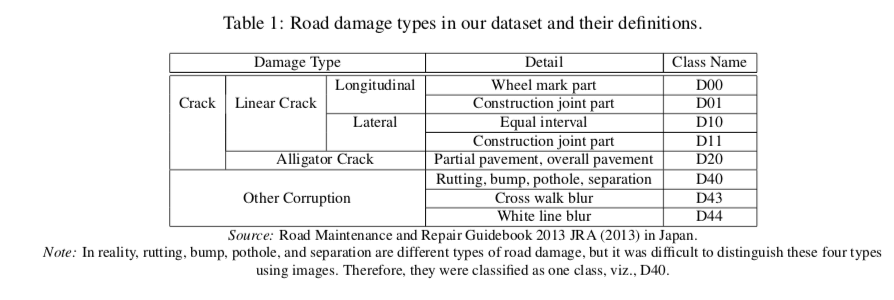

## JSON file creation for test1

In [165]:
images = []

def format_as_json():
    annotations = open("annotation.txt", "r")
    for data in annotations:
        line = data.strip().split(',')
        key = line[0]
        if(line[1]==''):
            line[1] = '0'
        obj = line[1].split()
        image = {
            key: [
                {
                    'class': obj[0],
                    'location': ' '.join(map(str, obj[1:5])),
                }
            ]
        }

        index=5
        while(len(obj[index:])!=0):
            image[key].append({
                'class': obj[index],
                'location': ' '.join(map(str, obj[index+1:index+5])),
            })
            index=index+5

        images.append(image)

    annotations.close()

def save_as_json():
    with open('data.json', 'w') as fp:
        json.dump(images, fp)

format_as_json()
save_as_json()

## DataFrame file creation for test1

In [264]:
def dataframe_creation():
    keys = []
    classes = []
    objects = []
    damages = []
    countries = []
    
    annotations = open("annotation.txt", "r")
    for data in annotations:
        line = data.strip().split(',')
        if(line[1]==''):
            line[1] = '0'
        objs = line[1].split()
        
        key = line[0]
        obj = ' '.join(map(str, objs[1:5]))
        country = key.split('_')[0]
        
        keys.append(key)
        classes.append(int(objs[0]))
        damages.append(damageTypes[int(objs[0])])
        objects.append(obj if len(obj)!=0 else "None")
        countries.append(country)

        index=5
        while(len(objs[index:])!=0):
            keys.append(key)
            classes.append(int(objs[index]))
            damages.append(damageTypes[int(objs[index])])
            obj = ' '.join(map(str, objs[index+1:index+5]))
            objects.append(obj if len(obj)!=0 else "None")
            countries.append(country)
            index = index + 5
    
    frame = {'image': keys, 'class': classes, 'damage_type': damages, 'object': objects, 'country': countries}
    df = pd.DataFrame(frame)
    return df

df = dataframe_creation()
with pd.ExcelWriter('data.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet') 

In [265]:
df.head()

,image,class,damage_type,object,country
0,Czech_003090.jpg,0,None,None,Czech
1,Japan_001851.jpg,1,D00,37 422 151 590,Japan
2,Japan_007255.jpg,0,None,None,Japan
3,Japan_005918.jpg,0,None,None,Japan
4,Japan_004468.jpg,3,D20,427 436 594 587,Japan


Text(0.5, 1.0, 'Damage Type Classes Frequency')

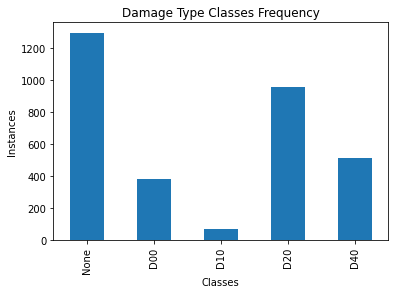

In [329]:
bar = df["class"].value_counts()
bar = bar.sort_index()
bar.plot(kind="bar")

plt.xticks((0, 1, 2, 3, 4), ("None", "D00", "D10", "D20", "D40"))
plt.xlabel("Classes")
plt.ylabel("Instances")
plt.title("Damage Type Classes Frequency")

# Preprocessing

In [166]:
# the number of total images and total labels.
keys = []
classes = []
objects = []
damages = []
countries = []

total_images = 0
for gov in govs:
    
    total_images = total_images + 1
    path = base_path + gov + '/annotations/xmls/'
    files = os.listdir(path)
    for file in files:
        with open(os.path.join(path, file), 'r') as fp:
            data = fp.read()
            
            Bs_data = BeautifulSoup(data, "xml")
            print(os.path.join(path, file))
            img_name = Bs_data.find('filename').text
            cls_name = [i.get_text() for i in Bs_data.find_all('name')]
            obj_xmin = [i.get_text() for i in Bs_data.find_all('xmin')]
            obj_ymin = [i.get_text() for i in Bs_data.find_all('ymin')]
            obj_xmax = [i.get_text() for i in Bs_data.find_all('xmax')]
            obj_ymax = [i.get_text() for i in Bs_data.find_all('ymax')]
            keys.append(img_name)
            if(len(cls_name)!=0):
                index=0
                for i in cls_name:
                    keys.append(img_name)
                    classes.append(damageTypes.index(i))
                    damages.append(i)
                    objects.append("{xmin} {ymin} {xmax} {ymax}".format(xmin = obj_xmin[index], 
                                                                        ymin = obj_ymin[index],
                                                                        xmax = obj_xmax[index],
                                                                        ymax = obj_ymax[index]))
                    countries.append(img_name.split('_')[0])
                    
            else:
                keys.append(img_name)
                classes.append(0)
                damages.append('None')
                objects.append("None")
                countries.append(img_name.split('_')[0])
                
                
                
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000000.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000001.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000002.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000006.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000007.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000009.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000010.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000011.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000012.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000013.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000225.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000226.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000230.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000233.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000234.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000235.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000236.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000239.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000240.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000242.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000457.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000458.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000459.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000462.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000463.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000464.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000465.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000467.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000468.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000469.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000679.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000680.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000681.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000682.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000684.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000685.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000687.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000688.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000689.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000690.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000889.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000890.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000891.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000892.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000893.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000894.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000895.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000897.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000898.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_000899.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001130.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001133.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001134.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001135.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001136.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001137.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001138.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001139.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001140.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001141.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001350.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001353.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001354.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001355.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001356.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001357.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001358.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001359.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001360.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001361.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001512.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001514.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001515.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001516.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001517.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001518.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001519.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001520.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001521.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001522.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001687.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001688.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001689.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001690.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001691.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001694.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001695.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001696.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001698.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001699.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001865.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001866.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001867.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001868.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001869.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001871.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001872.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001873.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001874.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_001875.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002028.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002029.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002030.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002031.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002032.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002033.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002034.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002035.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002037.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002040.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002208.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002209.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002211.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002212.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002213.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002214.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002215.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002216.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002217.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002218.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002398.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002399.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002400.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002401.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002403.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002404.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002405.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002406.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002407.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002408.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002555.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002556.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002557.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002559.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002560.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002561.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002565.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002566.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002568.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002569.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002743.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002745.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002746.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002747.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002748.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002749.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002750.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002751.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002752.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002753.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002949.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002951.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002953.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002954.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002956.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002957.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002958.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002959.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002961.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_002963.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003165.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003166.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003167.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003168.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003169.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003170.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003171.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003172.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003173.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003174.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003389.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003390.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003391.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003393.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003394.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003395.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003396.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003397.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003398.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/annotations/xmls/Czech_003399.xml
E:\Project\Python\Jupyter\road-damage-detection/train/Czech/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000000.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000001.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000002.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000003.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000005.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000007.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000010.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000011.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000012.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000014.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000204.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000205.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000206.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000207.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000208.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000209.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000210.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000213.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000214.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000217.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000339.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000340.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000341.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000343.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000345.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000347.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000348.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000349.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000350.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000351.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000495.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000496.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000497.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000498.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000499.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000500.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000501.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000502.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000503.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000504.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000682.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000683.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000684.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000685.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000688.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000690.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000691.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000692.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000693.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000694.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000872.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000873.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000874.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000879.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000881.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000882.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000884.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000885.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000887.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_000888.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001057.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001058.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001059.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001060.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001061.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001063.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001064.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001065.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001066.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001067.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001247.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001249.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001250.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001251.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001252.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001253.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001254.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001257.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001259.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001260.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001440.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001441.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001442.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001443.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001445.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001446.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001448.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001449.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001450.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001451.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001604.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001605.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001606.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001607.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001609.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001610.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001611.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001612.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001616.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001617.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001774.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001775.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001776.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001777.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001778.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001779.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001780.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001782.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001783.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001785.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001959.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001960.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001962.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001963.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001964.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001966.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001967.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001969.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001970.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_001971.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002135.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002136.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002137.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002138.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002139.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002140.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002141.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002142.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002143.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002144.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002342.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002343.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002344.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002345.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002347.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002348.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002349.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002350.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002351.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002352.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002520.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002521.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002522.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002523.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002524.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002525.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002527.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002528.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002530.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002532.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002670.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002671.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002672.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002673.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002674.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002675.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002676.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002678.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002679.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002680.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002853.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002854.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002855.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002856.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002858.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002859.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002860.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002862.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002863.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_002864.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003051.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003052.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003054.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003055.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003056.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003057.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003058.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003059.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003060.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003062.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003237.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003239.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003240.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003242.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003243.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003244.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003245.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003246.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003247.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003248.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003433.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003434.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003435.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003436.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003437.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003438.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003443.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003444.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003445.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003446.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003614.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003616.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003617.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003618.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003619.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003621.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003622.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003623.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003624.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003626.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003791.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003792.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003793.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003795.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003796.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003797.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003800.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003802.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003805.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003806.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003974.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003975.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003976.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003979.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003980.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003981.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003983.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003985.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003986.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_003987.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004156.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004157.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004158.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004160.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004161.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004162.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004163.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004164.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004165.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004166.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004341.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004342.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004343.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004344.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004345.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004346.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004348.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004349.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004352.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004353.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004537.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004540.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004541.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004542.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004543.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004544.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004547.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004548.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004549.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004550.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004731.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004732.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004733.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004734.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004735.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004738.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004739.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004740.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004741.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004742.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004946.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004947.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004948.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004949.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004952.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004954.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004956.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004958.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004959.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_004961.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005155.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005156.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005159.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005160.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005161.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005162.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005163.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005164.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005165.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005166.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005366.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005368.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005369.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005370.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005371.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005372.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005373.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005374.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005375.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005376.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005552.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005555.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005556.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005557.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005558.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005559.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005560.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005561.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005562.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005563.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005744.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005745.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005746.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005747.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005748.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005750.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005751.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005752.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005753.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005754.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005908.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005909.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005910.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005911.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005912.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005913.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005914.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005916.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005917.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_005918.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006094.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006095.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006096.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006097.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006098.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006099.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006100.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006101.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006102.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006103.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006290.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006291.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006292.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006293.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006295.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006297.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006300.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006301.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006302.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006303.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006470.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006473.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006474.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006475.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006476.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006478.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006479.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006480.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006481.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006482.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006641.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006643.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006644.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006645.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006646.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006647.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006648.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006649.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006650.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006651.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006823.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006824.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006825.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006826.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006827.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006829.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006831.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006832.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006834.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_006835.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007001.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007002.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007004.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007006.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007007.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007008.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007009.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007011.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007012.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007013.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007173.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007174.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007175.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007178.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007179.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007180.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007181.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007182.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007183.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007184.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007351.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007353.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007354.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007355.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007356.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007357.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007359.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007360.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007362.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007363.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007534.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007535.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007536.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007537.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007538.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007539.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007540.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007542.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007543.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007545.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007707.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007708.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007709.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007710.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007712.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007713.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007714.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007716.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007717.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007718.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007882.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007883.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007884.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007886.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007887.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007888.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007890.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007891.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007892.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_007893.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008058.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008059.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008061.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008062.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008063.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008064.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008065.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008067.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008068.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008070.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008231.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008232.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008233.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008235.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008236.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008237.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008238.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008239.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008241.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008242.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008409.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008412.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008413.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008415.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008416.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008417.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008420.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008421.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008423.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008425.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008621.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008622.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008623.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008624.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008625.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008626.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008627.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008628.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008629.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008631.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008785.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008786.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008787.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008789.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008790.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008792.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008794.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008795.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008796.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008798.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008950.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008951.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008952.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008953.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008954.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008955.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008956.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008957.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008959.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_008960.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009120.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009121.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009122.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009123.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009124.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009127.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009128.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009129.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009130.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009131.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009295.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009296.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009297.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009298.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009299.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009300.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009302.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009303.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009304.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009305.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009487.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009488.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009494.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009495.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009501.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009503.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009505.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009506.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009507.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009509.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009696.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009697.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009698.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009699.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009700.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009701.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009702.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009703.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009704.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/annotations/xmls/India_009706.xml
E:\Project\Python\Jupyter\road-damage-detection/train/India/

AttributeError: 'NoneType' object has no attribute 'text'